Running the next cell is not necessary if the required packages are already installed

In [ ]:
!pip install qiskit[visualization]==0.43.3
!pip install qiskit-aer

The next cell imports the necessary libraries. Running it is necessary.

In this notebook, the application is implemented using the Qiskit framework.

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from random import randrange

Following cell is the main teleportation function. The `teleport_bit` function teleports a single bit (0 or 1) using one of four Bell states ($|\Phi^+\rangle, |\Phi^-\rangle, |\Psi^+\rangle, |\Psi^-\rangle$) chosen randomly. The teleported bit is stored in `global_received_bits`.

#### How it Ensures Security
1. **Random Bell State Selection:** The function randomly selects one of four Bell states, making it hard for an eavesdropper to infer the entanglement correlation.
2. **Classical Channel Uncertainty:** Intercepted classical bits ($c_1, c_2$) alone are insufficient to reconstruct the teleported bit without knowledge of the Bell state.
3. **Quantum Principles:** The no-cloning theorem ensures the original quantum state cannot be copied, preserving security.

#### Probability of Guessing a Byte
- To guess one bit correctly, an eavesdropper must identify the Bell state ($\frac{1}{4}$ chance).
- For a byte (8 bits):

 $P_{correct}=(\frac{1}{4})^{8}=(\frac{1}{65,536})\approx0.0015\%$

Thus, guessing the entire byte is highly improbable. When guessing strings of thousands of characters, it becomes even harder, or in simple words, almost impossible.


In [2]:
# Global list to store received bits
global_received_bits = []

def teleport_bit(bit):
    # Create quantum and classical registers
    q = QuantumRegister(3, "q")
    c = ClassicalRegister(3, "c")
    qc = QuantumCircuit(q, c)

    # The Bell states used for teleportation are |phi+>, |phi->, |psi+>, and |psi->
    # represented by 1, 2, 3, and 4 respectively

    # Prepare entanglement
    state = randrange(1, 5)
    if state == 1:
        # State is |phi+>
        qc.h(q[1])
        qc.cx(q[1], q[0])
    elif state == 2:
        # State is |phi->
        qc.h(q[1])
        qc.cx(q[1], q[0])
        qc.z(q[1])
    elif state == 3:
        # State is |psi+>
        qc.h(q[0])
        qc.cx(q[0], q[1])
    else:
        # State is |psi->
        qc.h(q[0])
        qc.cx(q[0], q[1])
        qc.z(q[1])

    # Encode the bit in the message qubit
    if bit == 1:
        qc.x(q[2])

    # Teleportation operations
    qc.cx(q[2], q[1])
    qc.h(q[2])

    # Measure the qubits
    qc.measure(q[2], c[2])
    qc.measure(q[1], c[1])

    # Apply corrections
    qc.x(q[0]).c_if(c[1], 1)  # Apply X correction
    qc.z(q[0]).c_if(c[2], 1)  # Apply Z correction

    # Measure the receiver qubit
    qc.measure(q[0], c[0])

    # Execute the circuit
    backend = Aer.get_backend("qasm_simulator")
    job = execute(qc, backend, shots=1)
    count = job.result().get_counts(qc)

    # Extract the teleported bit
    received_bit = int(list(count.keys())[0][2])
    global_received_bits.append(received_bit)


Following function converts a given string to binary bits and adds them in the list `binary_list`.

In [3]:
# Function to convert a string to a list of binary bits
def string_to_binary(input_string):
    binary_list = []
    for char in input_string:
        binary_representation = format(ord(char), '08b')  # Convert character to 8-bit binary
        binary_list.extend([int(bit) for bit in binary_representation])
    return binary_list

Following function converts the received binary bits back to the ASCII characters. It is required to present the information to the receiver in a readable format.

In [4]:
# Function to convert binary bits to ASCII characters
def binary_to_string(binary_list):
    chars = []
    for i in range(0, len(binary_list), 8):
        byte = binary_list[i:i+8]  # Take 8 bits at a time
        char = chr(int(''.join(map(str, byte)), 2))  # Convert to ASCII
        chars.append(char)
    return ''.join(chars)

Following cell contains the interaction part of the program. It asks the user for the message to be teleported.

It also presents a sample quantum circuit to the user, telling them about the backbone of the communication.

Then the prepared qubit is quantum-teleported by the function `teleport_bit()` and received by the receiver at their end.

Lastly, the received message is presented as both binary and readable format for the receiver.

Enter a message to be teleported: Innovation begins with understanding the quantum world.

Binary Representation:
 [0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,

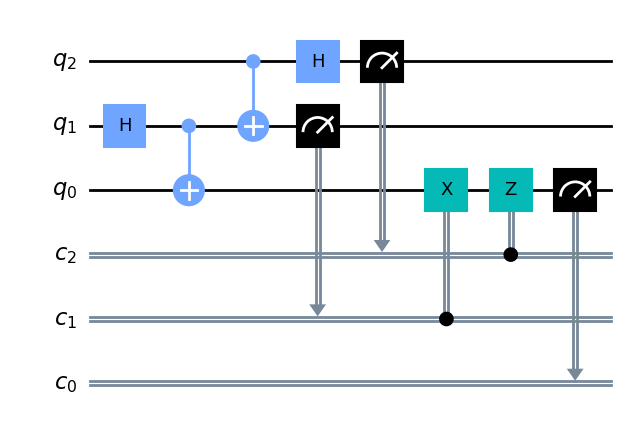


Received Bits: [0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [5]:
# Step 1: Get user input
user_input = input("Enter a message to be teleported: ")

# Step 2: Convert the string to binary
binary_data = string_to_binary(user_input)
print("\nBinary Representation:\n", binary_data)
global_received_bits = []

print("\n\nA sample representation of the teleportation circuit (default bit is 0):")

q = QuantumRegister(3, "q")
c = ClassicalRegister(3, "c")
qc = QuantumCircuit(q, c)
# Prepare entanglement
qc.h(q[1])
qc.cx(q[1], q[0])
# No encoding needed for bit 0 (considering bell state |phi+> and message bit as 0)
# Teleportation operations
qc.cx(q[2], q[1])
qc.h(q[2])
# Measure the qubits
qc.measure(q[2], c[2])
qc.measure(q[1], c[1])
# Apply corrections
qc.x(q[0]).c_if(c[1], 1)
qc.z(q[0]).c_if(c[2], 1)
# Measure the receiver qubit
qc.measure(q[0], c[0])
# Print the quantum circuit
display(qc.draw(output = 'mpl', reverse_bits = True))

# Step 3: Teleport each bit
for bit in binary_data:
    teleport_bit(bit)

# Step 4: Print received bits
print("\nReceived Bits:", global_received_bits)

# Step 5: Convert received bits to ASCII characters
received_string = binary_to_string(global_received_bits)
print("\nReceived Message:", received_string)

### More Information

This program showcases quantum teleportation for secure communication. Given the current limitations in accessing actual quantum computers and physical quantum channels, this demonstration is conducted on a simulator. While simulators can replicate quantum operations, they cannot physically distribute entangled qubits across different devices, which is crucial for real-world quantum teleportation. Therefore, the entire teleportation process is simulated on a single device.

Quantum teleportation is fundamentally secure because it is based on the principles of quantum mechanics, such as entanglement and the no-cloning theorem. These principles ensure that any attempt to intercept or duplicate the quantum state would disturb the system, making eavesdropping detectable. In a practical scenario, with access to quantum hardware and channels, this program could be implemented with minimal adjustments to achieve secure real-world teleportation.

According to Wikipedia
- **Quantum Entanglement**: Quantum entanglement is the phenomenon of a group of particles being generated, interacting, or sharing spatial proximity in such a way that the quantum state of each particle of the group cannot be described independently of the state of the others, including when the particles are separated by a large distance.
- **No-Cloning Theorem**: In physics, the no-cloning theorem states that it is impossible to create an independent and identical copy of an arbitrary unknown quantum state, a statement which has profound implications in the field of quantum computing among others.

<br>
Saurabh Suman<br>2<sup>nd</sup> year student (2023-27) at E&TC Deptt<br>Jabalpur Engineering College